# Yeni Bölüm

In [1]:

#-----------------------------
import numpy as np
import pandas as pd
import re
import string
import nltk
import seaborn as sns
import matplotlib.pyplot  as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import spacy
import time
import swifter
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('words')
from nltk.corpus import words
nlp = spacy.load("en_core_web_sm")
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.tokenize import word_tokenize,  sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
import gensim
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from textblob import TextBlob
from textblob import Word
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
import swifter
from gensim.models import Word2Vec
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Veri setini yükleyin
data_true = pd.read_csv('data/True.csv')
data_fake = pd.read_csv('data/Fake.csv')
print("1")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


1


In [2]:
data_true[['title', 'text']] = data_true[['text', 'title']]
# 'text' sütunundaki her bir satırdaki ilk "-" işaretinden önceki kısmı sil
data_true['title'] = data_true['title'].apply(lambda x: x.split('-', 1)[-1].strip())
data_true[['text', 'title']] = data_true[['title', 'text']]
data_true['title'] = data_true['title'].apply(lambda x: x.split('-', 1)[-1].strip())

data_true = data_true[~data_true['text'].str.contains('twitter', case=False)]
data_fake = data_fake[~data_fake['text'].str.contains('twitter', case=False)]

print("true data sayısı:",data_true.shape)
print("fake data sayısı:",data_fake.shape)

# Fake veri setindeki örnek sayısını true veri setine eşitle
data_true= resample(data_true, replace=True, n_samples=len(data_fake), random_state=42)
print("Fake sayısı: ",data_fake.shape)
print("True Sayısı",data_true.shape)

# Etiket ekle
data_true['class'] = 1  # True sınıfını temsil eden etiket
data_fake['class'] = 0  # Fake sınıfını temsil eden etiket

# Veri setlerini birleştirir
merged_data = pd.concat([data_true, data_fake], ignore_index=True)
print(merged_data.shape)

# lower
merged_data['title'] = merged_data['title'].str.lower()
merged_data['text'] = merged_data['text'].str.lower()

#boş satırları kaldırdı
merged_data = merged_data.dropna()

# Veri setinde tekrar eden satırları kaldırma
merged_data.drop_duplicates(inplace=True)
print(merged_data.head())

true data sayısı: (19759, 4)
fake data sayısı: (17851, 4)
Fake sayısı:  (17851, 4)
True Sayısı (17851, 4)
(35702, 5)
                                               title  \
0  detention of catalan activists a judicial, not...   
1  trump tax overhaul under intensifying fire as ...   
2                      dodge complaint against trump   
3  with algeria's future uncertain, macron unlike...   
4  nato chief stoltenberg wins extended term to l...   

                                                text       subject  \
0  the detention of catalan activists on monday, ...     worldnews   
1  president donald trump’s plan for overhauling ...  politicsNews   
2  a mexican official widened a tax evasion compl...  politicsNews   
3  french president emmanuel macron is likely to ...     worldnews   
4  nato allies extended jens stoltenberg s term a...     worldnews   

                 date  class  
0   October 17, 2017       1  
1   October 29, 2017       1  
2   January 26, 2017       1  
3

In [3]:
# Stopwords'leri kaldırma fonksiyonu
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return ' '.join(filtered_text)

# Başlık ve metin sütunlarındaki stopwords'leri kaldır
merged_data['title'] = merged_data['title'].apply(lambda x: remove_stopwords(x) if isinstance(x, str) else x)
merged_data['text'] = merged_data['text'].apply(lambda x: remove_stopwords(x) if isinstance(x, str) else x)
#-----------------------

print("Stopwordsler kaldırıldı..")
print(merged_data.head(10))


Stopwordsler kaldırıldı..
                                               title  \
0  detention catalan activists judicial , politic...   
1  trump tax overhaul intensifying fire congress ...   
2                              dodge complaint trump   
3  algeria 's future uncertain , macron unlikely ...   
4  nato chief stoltenberg wins extended term late...   
5  cia 's brennan says tearing iran deal would 'f...   
6  philippines ' duterte takes aim graft agency h...   
7  trump nominate goldman sachs ' donovan deputy ...   
8  uk raises 'grave concerns ' illegal settlement...   
9  exclusive : philippines defied experts ' advic...   

                                                text       subject  \
0  detention catalan activists monday , first imp...     worldnews   
1  president donald trump ’ plan overhauling u.s....  politicsNews   
2  mexican official widened tax evasion complaint...  politicsNews   
3  french president emmanuel macron likely use vi...     worldnews   
4  nato

In [4]:
# parantez içi ve noktalamaları kaldırma
def wordopt(text):
    text = re.sub(r'\([^)]*\)', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

merged_data["text"] = merged_data["text"].apply(wordopt)
merged_data["title"] = merged_data["title"].apply(wordopt)

# 'text' ve 'title' sütunlarındaki kelimeler arasındaki boşlukları düzenle
merged_data['text'] = merged_data['text'].apply(lambda x: re.sub(r'\s+', ' ', x))
merged_data['title'] = merged_data['title'].apply(lambda x: re.sub(r'\s+', ' ', x))

#text ve title birleştirmesi
merged_data['combined_text'] = merged_data['title'] + ' ' + merged_data['text']
print(merged_data.head())

                                               title  \
0  detention catalan activists judicial political...   
1  trump tax overhaul intensifying fire congress ...   
2                              dodge complaint trump   
3  algeria s future uncertain macron unlikely dwe...   
4    nato chief stoltenberg wins extended term late    

                                                text       subject  \
0  detention catalan activists monday first impri...     worldnews   
1  president donald trump plan overhauling u s ta...  politicsNews   
2  mexican official widened tax evasion complaint...  politicsNews   
3  french president emmanuel macron likely use vi...     worldnews   
4  nato allies extended jens stoltenberg term sec...     worldnews   

                 date  class  \
0   October 17, 2017       1   
1   October 29, 2017       1   
2   January 26, 2017       1   
3   December 4, 2017       1   
4  December 12, 2017       1   

                                       combined_t

In [5]:
# İngilizce sözlüğü yükleyin
english_dictionary = set(words.words())

# Sözlükte olmayan kelimeleri kontrol eden fonksiyon
def filter_non_english_words(tokens):
    return [word for word in tokens if word.lower() in english_dictionary or not word.isalpha()]

# 'combined_text' sütunundaki cümleleri filtrele
merged_data['filtered_text'] = merged_data['combined_text'].apply(lambda x: ' '.join(filter_non_english_words(word_tokenize(x))))

# Sadece sözlükte bulunan kelimeler içeren cümleleri seç
filtered_data = merged_data[merged_data['filtered_text'].apply(lambda x: len(word_tokenize(x)) > 0)]

# 'filtered_text' ve 'class' sütunları dışındaki sütunları at
filtered_data = filtered_data[['filtered_text', 'class']]

# Eski indeksi sıfırla
filtered_data.reset_index(drop=True, inplace=True)

print("Önceki veri sayısı:", merged_data.shape[0])
print("Filtrelenmiş veri sayısı:", filtered_data.shape[0])

# Kelime tokenizasyonu örneği
merged_data['tokenized_text'] = filtered_data['filtered_text'].apply(word_tokenize)

# 'tokenized_text' sütunundaki boş değerleri temizle
merged_data = merged_data.dropna(subset=['tokenized_text'])

# Yeniden indeksleme yapabilirsiniz
merged_data.reset_index(drop=True, inplace=True)

#lemma işlemi
lemmatizer = WordNetLemmatizer()
merged_data['lemmatized_text'] = merged_data['tokenized_text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
#merged_data['lemmatized_text'].to_csv('lemmalanmışSon.csv',index=False)

# Tek harf içeren tokenları kaldırma fonksiyonu
def remove_single_char_tokens(tokens):
    return [word for word in tokens if len(word) > 1]

# 'lemmatized_text' sütunundaki tek harf içeren tokenları kaldır
merged_data['lemmatized_text'] = merged_data['lemmatized_text'].apply(remove_single_char_tokens)

# Boş tokenları kaldırma fonksiyonu
def remove_empty_tokens(tokens):
    return [word for word in tokens if word]

# 'lemmatized_text' sütunundaki boş tokenları kaldır
merged_data['lemmatized_text'] = merged_data['lemmatized_text'].apply(remove_empty_tokens)

# Lemmatizasyon fonksiyonu
spacy_nlp = spacy.load('en_core_web_sm')

def lemmatize_text(text):
    doc = spacy_nlp(text)
    lemmatized_text = [token.lemma_ for token in doc]
    return lemmatized_text

# 'filtered_text' sütunundaki metinleri lemmatize et
merged_data['lemmatized_text'] = merged_data['lemmatized_text'].apply(lambda x: lemmatize_text(x) if isinstance(x, str) else x)
merged_data['lemmatized_text'].to_csv('oldumubibak.csv', index=False)

# Boş tokenları kaldırma fonksiyonu
def remove_empty_tokens(tokens):
    return [word for word in tokens if word]

# 'lemmatized_text' sütunundaki boş tokenları kaldır
merged_data['lemmatized_text'] = merged_data['lemmatized_text'].apply(remove_empty_tokens)

# Önceki indeksi sıfırla
merged_data['lemmatized_text'].reset_index(drop=True, inplace=True)
print(merged_data.head(10))

Önceki veri sayısı: 29540
Filtrelenmiş veri sayısı: 29539
                                               title  \
0  detention catalan activists judicial political...   
1  trump tax overhaul intensifying fire congress ...   
2                              dodge complaint trump   
3  algeria s future uncertain macron unlikely dwe...   
4    nato chief stoltenberg wins extended term late    
5  cia s brennan says tearing iran deal would folly    
6  philippines duterte takes aim graft agency hea...   
7  trump nominate goldman sachs donovan deputy tr...   
8  uk raises grave concerns illegal settlements i...   
9  exclusive philippines defied experts advice pu...   

                                                text       subject  \
0  detention catalan activists monday first impri...     worldnews   
1  president donald trump plan overhauling u s ta...  politicsNews   
2  mexican official widened tax evasion complaint...  politicsNews   
3  french president emmanuel macron likely us

K-NN Model Accuracy: 0.8299828913601369
----------------------------------------------------
K-NN Model Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.78      0.82      2337
           1       0.80      0.88      0.84      2339

    accuracy                           0.83      4676
   macro avg       0.83      0.83      0.83      4676
weighted avg       0.83      0.83      0.83      4676



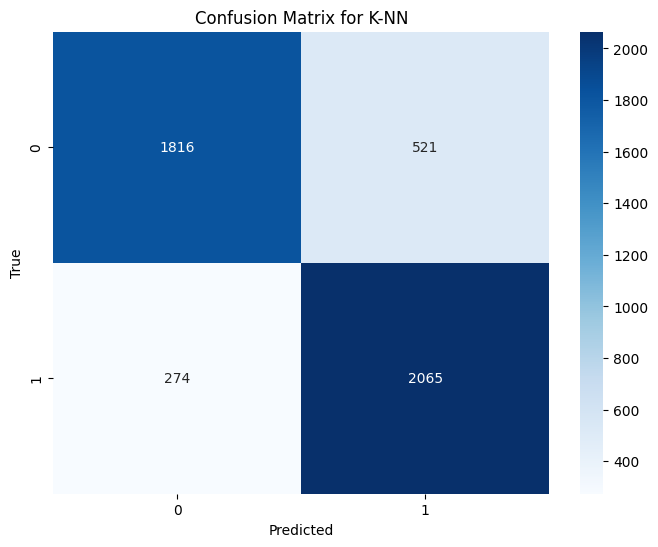

Naive Bayes Model Accuracy: 0.8344739093242087
----------------------------------------------------
Naive Bayes Model Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84      2337
           1       0.86      0.79      0.83      2339

    accuracy                           0.83      4676
   macro avg       0.84      0.83      0.83      4676
weighted avg       0.84      0.83      0.83      4676



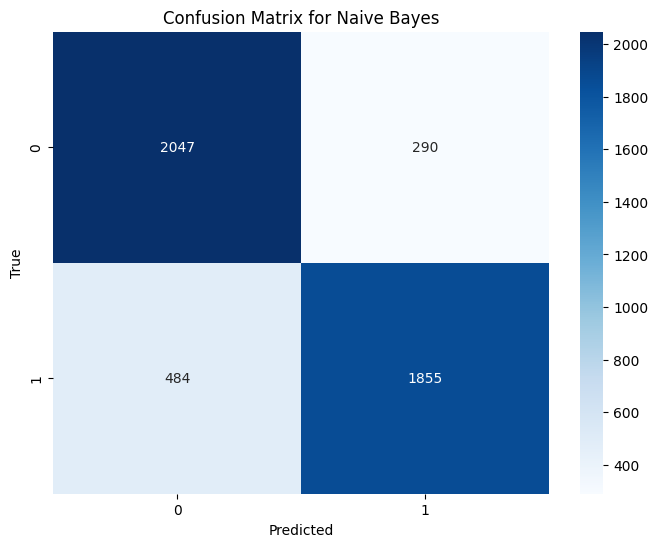

Accuracy: 0.9726
----------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2337
           1       0.97      0.98      0.97      2339

    accuracy                           0.97      4676
   macro avg       0.97      0.97      0.97      4676
weighted avg       0.97      0.97      0.97      4676



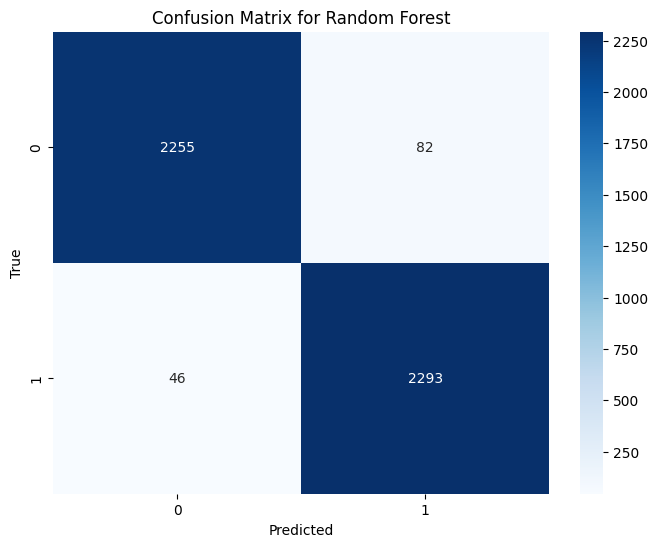

Logistic Regression Model Accuracy: 0.935414884516681
----------------------------------------------------
Logistic Regression Model Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      2337
           1       0.94      0.93      0.94      2339

    accuracy                           0.94      4676
   macro avg       0.94      0.94      0.94      4676
weighted avg       0.94      0.94      0.94      4676



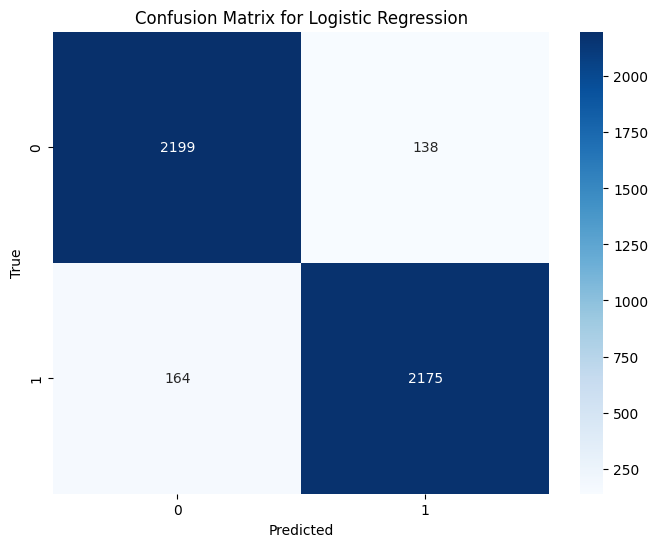

Epoch 1/20
585/585 [==============================] - 9s 14ms/step - loss: 0.6896 - accuracy: 0.8254 - val_loss: 0.5993 - val_accuracy: 0.8725
Epoch 2/20
585/585 [==============================] - 10s 18ms/step - loss: 0.5970 - accuracy: 0.8625 - val_loss: 0.5715 - val_accuracy: 0.8783
Epoch 3/20
585/585 [==============================] - 7s 12ms/step - loss: 0.5740 - accuracy: 0.8760 - val_loss: 0.5558 - val_accuracy: 0.8931
Epoch 4/20
585/585 [==============================] - 8s 13ms/step - loss: 0.5596 - accuracy: 0.8854 - val_loss: 0.5399 - val_accuracy: 0.9014
Epoch 5/20
585/585 [==============================] - 6s 11ms/step - loss: 0.5532 - accuracy: 0.8917 - val_loss: 0.5281 - val_accuracy: 0.9048
Epoch 6/20
585/585 [==============================] - 8s 14ms/step - loss: 0.5491 - accuracy: 0.8917 - val_loss: 0.5214 - val_accuracy: 0.9080
Epoch 7/20
585/585 [==============================] - 6s 11ms/step - loss: 0.5432 - accuracy: 0.8980 - val_loss: 0.5307 - val_accuracy: 0.913

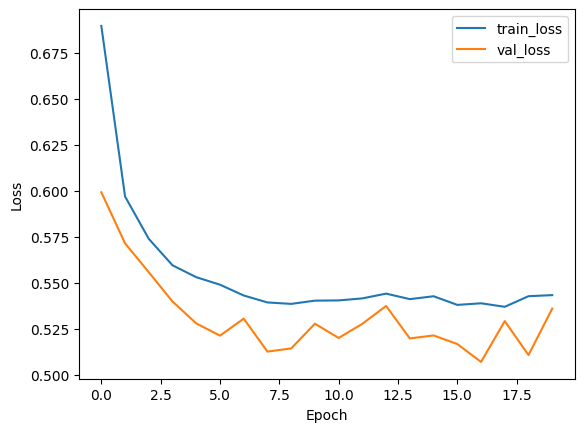

147/147 [==============================] - 1s 4ms/step


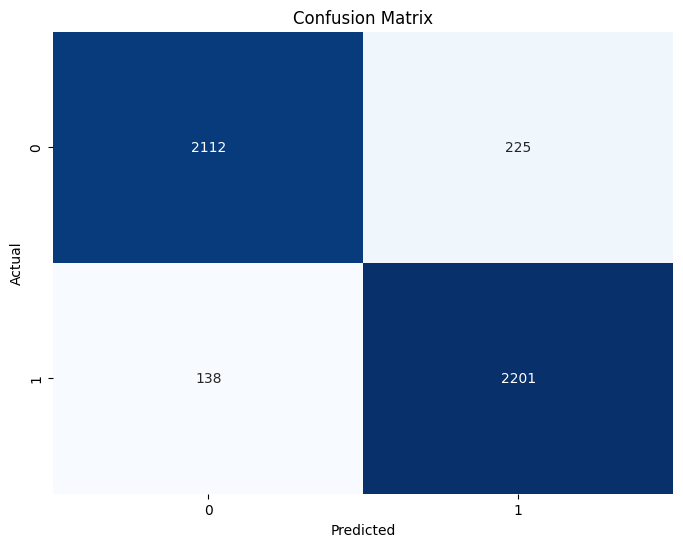

Accuracy: 0.9224
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2337
           1       0.91      0.94      0.92      2339

    accuracy                           0.92      4676
   macro avg       0.92      0.92      0.92      4676
weighted avg       0.92      0.92      0.92      4676

K-NN Model Accuracy: 0.8244225834046194
----------------------------------------------------
K-NN Model Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.78      0.82      2337
           1       0.80      0.87      0.83      2339

    accuracy                           0.82      4676
   macro avg       0.83      0.82      0.82      4676
weighted avg       0.83      0.82      0.82      4676



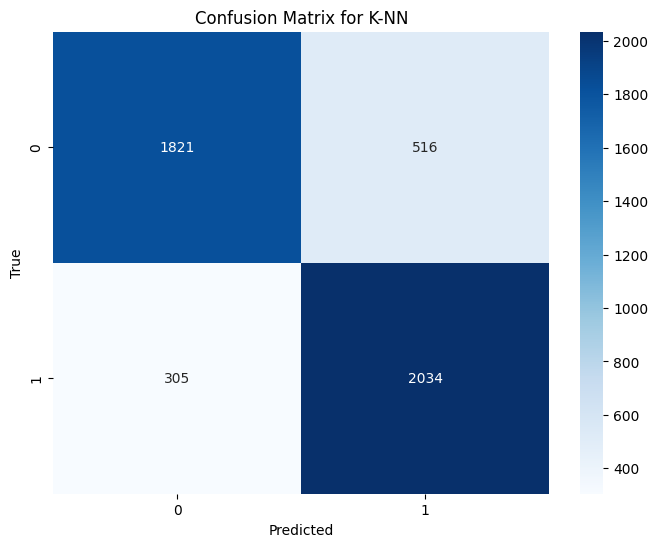

Naive Bayes Model Accuracy: 0.8327630453378957
----------------------------------------------------
Naive Bayes Model Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84      2337
           1       0.86      0.80      0.83      2339

    accuracy                           0.83      4676
   macro avg       0.83      0.83      0.83      4676
weighted avg       0.83      0.83      0.83      4676



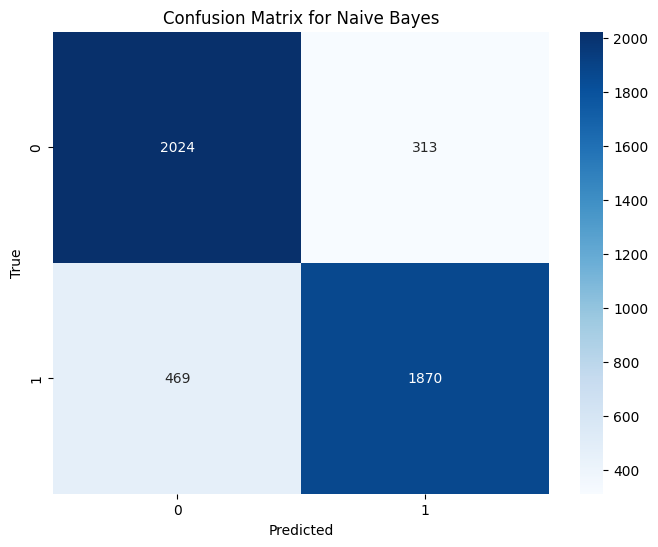

Accuracy: 0.9709
----------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2337
           1       0.97      0.98      0.97      2339

    accuracy                           0.97      4676
   macro avg       0.97      0.97      0.97      4676
weighted avg       0.97      0.97      0.97      4676



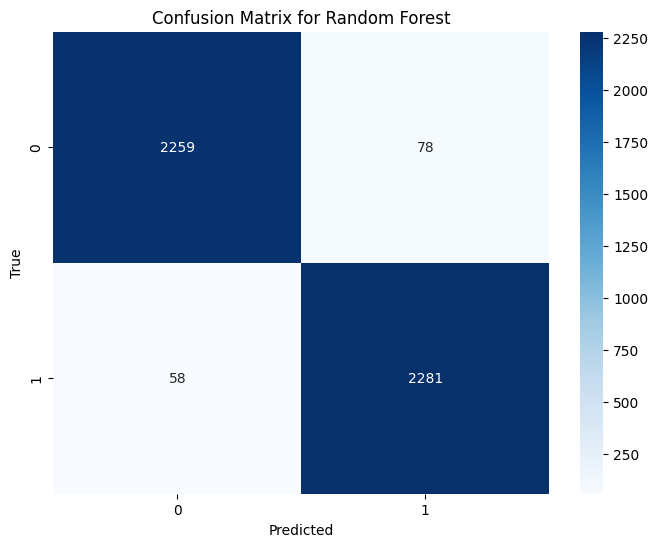

Logistic Regression Model Accuracy: 0.9343455945252352
----------------------------------------------------
Logistic Regression Model Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      2337
           1       0.94      0.93      0.93      2339

    accuracy                           0.93      4676
   macro avg       0.93      0.93      0.93      4676
weighted avg       0.93      0.93      0.93      4676



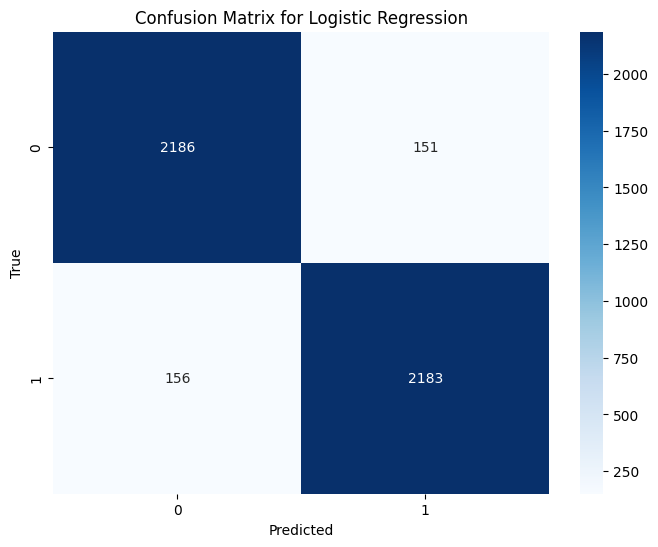

Epoch 1/20
585/585 [==============================] - 9s 14ms/step - loss: 0.6877 - accuracy: 0.8266 - val_loss: 0.6022 - val_accuracy: 0.8640
Epoch 2/20
585/585 [==============================] - 7s 11ms/step - loss: 0.5960 - accuracy: 0.8600 - val_loss: 0.5797 - val_accuracy: 0.8743
Epoch 3/20
585/585 [==============================] - 8s 14ms/step - loss: 0.5700 - accuracy: 0.8794 - val_loss: 0.5556 - val_accuracy: 0.8899
Epoch 4/20
585/585 [==============================] - 6s 11ms/step - loss: 0.5589 - accuracy: 0.8879 - val_loss: 0.5327 - val_accuracy: 0.9033
Epoch 5/20
585/585 [==============================] - 8s 13ms/step - loss: 0.5534 - accuracy: 0.8898 - val_loss: 0.5339 - val_accuracy: 0.9012
Epoch 6/20
585/585 [==============================] - 7s 12ms/step - loss: 0.5426 - accuracy: 0.8970 - val_loss: 0.5337 - val_accuracy: 0.9127
Epoch 7/20
585/585 [==============================] - 6s 11ms/step - loss: 0.5414 - accuracy: 0.8980 - val_loss: 0.5275 - val_accuracy: 0.9106

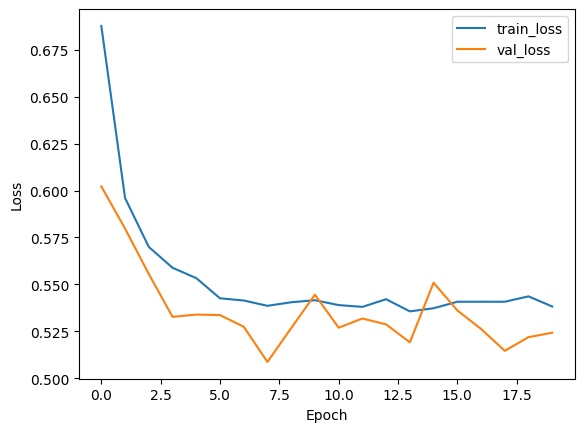

147/147 [==============================] - 1s 4ms/step


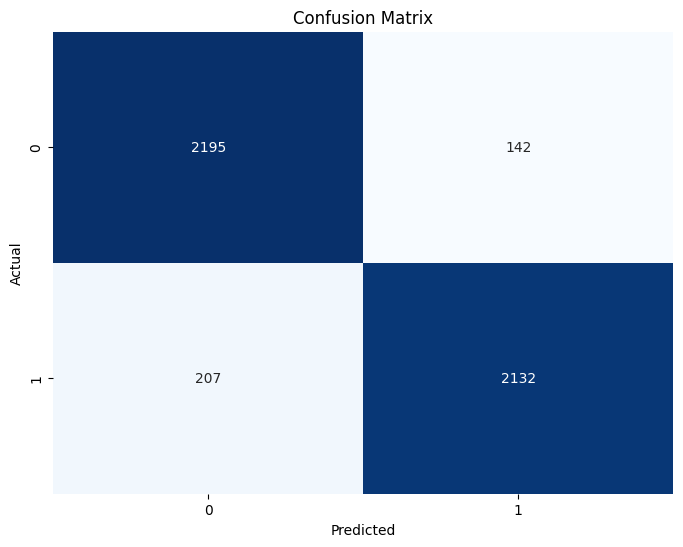

Accuracy: 0.9254
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      2337
           1       0.94      0.91      0.92      2339

    accuracy                           0.93      4676
   macro avg       0.93      0.93      0.93      4676
weighted avg       0.93      0.93      0.93      4676

K-NN Model Accuracy: 0.8192513368983957
----------------------------------------------------
K-NN Model Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.77      0.81      2337
           1       0.79      0.87      0.83      2338

    accuracy                           0.82      4675
   macro avg       0.82      0.82      0.82      4675
weighted avg       0.82      0.82      0.82      4675



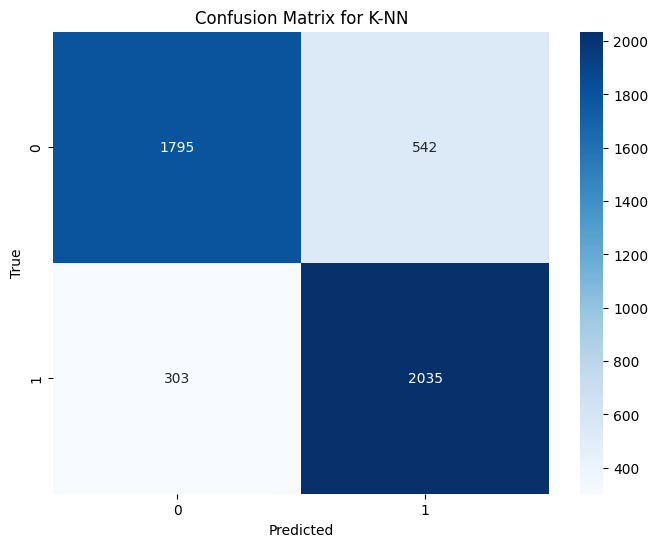

Naive Bayes Model Accuracy: 0.8393582887700535
----------------------------------------------------
Naive Bayes Model Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.85      2337
           1       0.87      0.80      0.83      2338

    accuracy                           0.84      4675
   macro avg       0.84      0.84      0.84      4675
weighted avg       0.84      0.84      0.84      4675



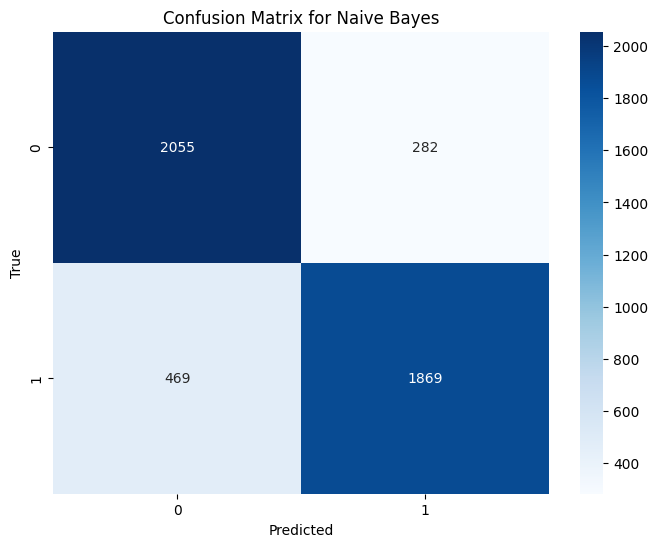

Accuracy: 0.9722
----------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2337
           1       0.97      0.98      0.97      2338

    accuracy                           0.97      4675
   macro avg       0.97      0.97      0.97      4675
weighted avg       0.97      0.97      0.97      4675



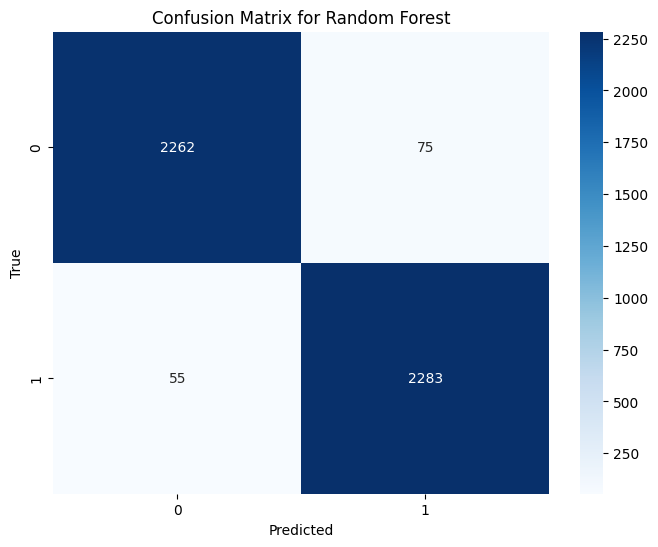

Logistic Regression Model Accuracy: 0.9381818181818182
----------------------------------------------------
Logistic Regression Model Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      2337
           1       0.95      0.93      0.94      2338

    accuracy                           0.94      4675
   macro avg       0.94      0.94      0.94      4675
weighted avg       0.94      0.94      0.94      4675



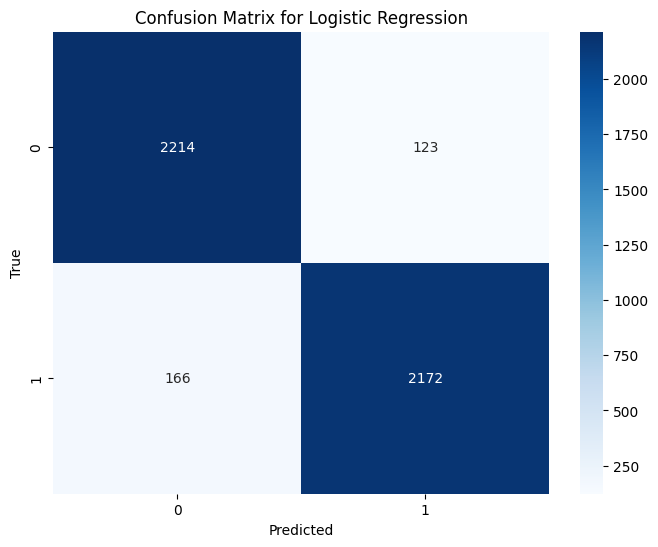

Epoch 1/20
585/585 [==============================] - 9s 14ms/step - loss: 0.6878 - accuracy: 0.8223 - val_loss: 0.5973 - val_accuracy: 0.8714
Epoch 2/20
585/585 [==============================] - 12s 21ms/step - loss: 0.5968 - accuracy: 0.8645 - val_loss: 0.5649 - val_accuracy: 0.8836
Epoch 3/20
585/585 [==============================] - 8s 13ms/step - loss: 0.5772 - accuracy: 0.8755 - val_loss: 0.5459 - val_accuracy: 0.8896
Epoch 4/20
585/585 [==============================] - 8s 13ms/step - loss: 0.5637 - accuracy: 0.8872 - val_loss: 0.5300 - val_accuracy: 0.9020
Epoch 5/20
585/585 [==============================] - 8s 14ms/step - loss: 0.5551 - accuracy: 0.8915 - val_loss: 0.5368 - val_accuracy: 0.9065
Epoch 6/20
585/585 [==============================] - 7s 12ms/step - loss: 0.5549 - accuracy: 0.8947 - val_loss: 0.5221 - val_accuracy: 0.9044
Epoch 7/20
585/585 [==============================] - 9s 16ms/step - loss: 0.5454 - accuracy: 0.8995 - val_loss: 0.5304 - val_accuracy: 0.920

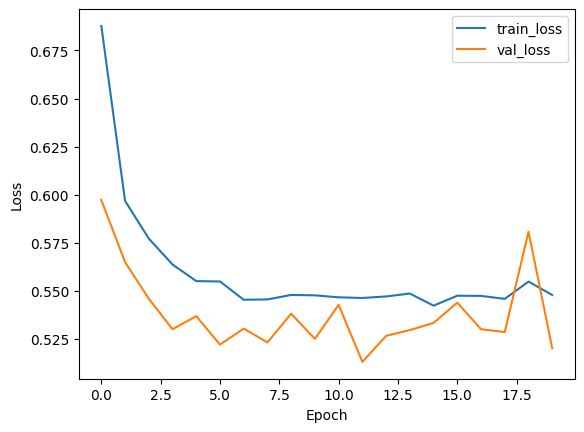

147/147 [==============================] - 1s 3ms/step


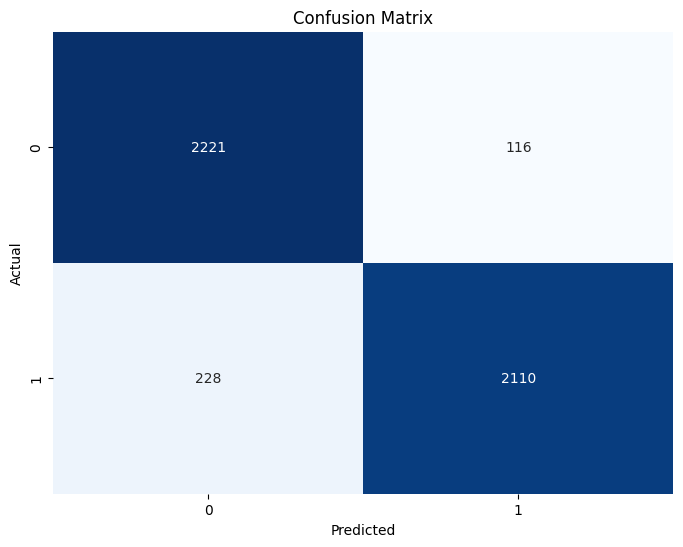

Accuracy: 0.9264
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2337
           1       0.95      0.90      0.92      2338

    accuracy                           0.93      4675
   macro avg       0.93      0.93      0.93      4675
weighted avg       0.93      0.93      0.93      4675

K-NN Model Accuracy: 0.8115508021390374
----------------------------------------------------
K-NN Model Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.76      0.80      2337
           1       0.78      0.86      0.82      2338

    accuracy                           0.81      4675
   macro avg       0.81      0.81      0.81      4675
weighted avg       0.81      0.81      0.81      4675



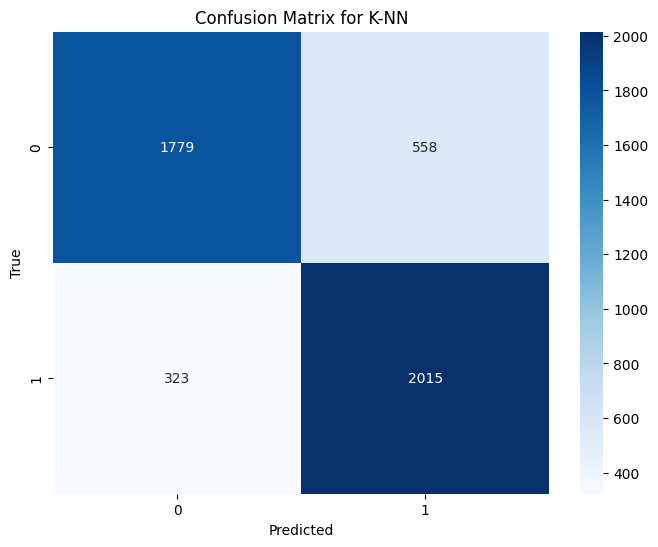

Naive Bayes Model Accuracy: 0.8168983957219251
----------------------------------------------------
Naive Bayes Model Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.82      2337
           1       0.84      0.78      0.81      2338

    accuracy                           0.82      4675
   macro avg       0.82      0.82      0.82      4675
weighted avg       0.82      0.82      0.82      4675



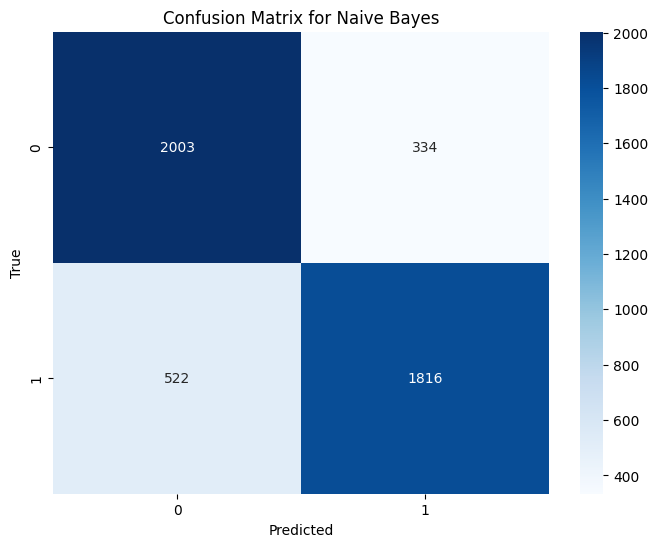

Accuracy: 0.9694
----------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2337
           1       0.97      0.97      0.97      2338

    accuracy                           0.97      4675
   macro avg       0.97      0.97      0.97      4675
weighted avg       0.97      0.97      0.97      4675



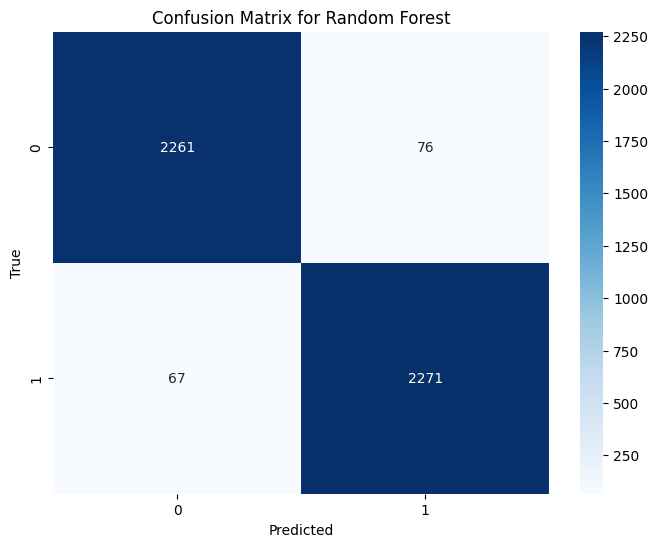

Logistic Regression Model Accuracy: 0.9317647058823529
----------------------------------------------------
Logistic Regression Model Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      2337
           1       0.93      0.93      0.93      2338

    accuracy                           0.93      4675
   macro avg       0.93      0.93      0.93      4675
weighted avg       0.93      0.93      0.93      4675



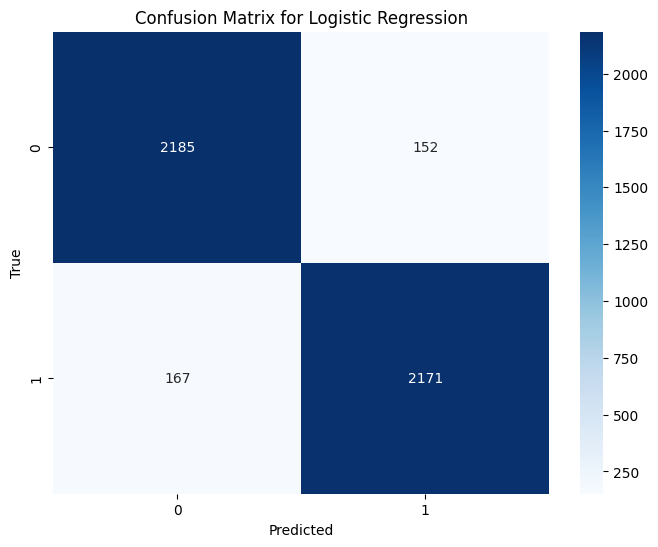

Epoch 1/20
585/585 [==============================] - 9s 14ms/step - loss: 0.6896 - accuracy: 0.8261 - val_loss: 0.6108 - val_accuracy: 0.8441
Epoch 2/20
585/585 [==============================] - 7s 13ms/step - loss: 0.5924 - accuracy: 0.8653 - val_loss: 0.5846 - val_accuracy: 0.8759
Epoch 3/20
585/585 [==============================] - 9s 15ms/step - loss: 0.5744 - accuracy: 0.8765 - val_loss: 0.5630 - val_accuracy: 0.8871
Epoch 4/20
585/585 [==============================] - 7s 12ms/step - loss: 0.5620 - accuracy: 0.8836 - val_loss: 0.5412 - val_accuracy: 0.8892
Epoch 5/20
585/585 [==============================] - 9s 15ms/step - loss: 0.5519 - accuracy: 0.8930 - val_loss: 0.5405 - val_accuracy: 0.9005
Epoch 6/20
585/585 [==============================] - 7s 12ms/step - loss: 0.5473 - accuracy: 0.8943 - val_loss: 0.5363 - val_accuracy: 0.9031
Epoch 7/20
585/585 [==============================] - 8s 14ms/step - loss: 0.5426 - accuracy: 0.9001 - val_loss: 0.5230 - val_accuracy: 0.9037

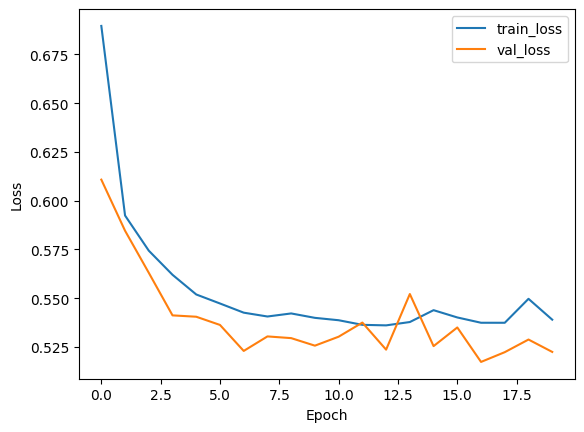

147/147 [==============================] - 1s 4ms/step


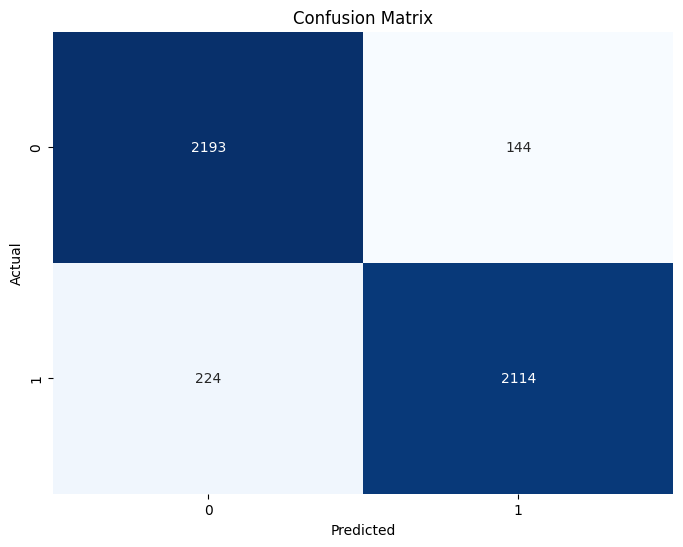

Accuracy: 0.9213
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      2337
           1       0.94      0.90      0.92      2338

    accuracy                           0.92      4675
   macro avg       0.92      0.92      0.92      4675
weighted avg       0.92      0.92      0.92      4675

K-NN Model Accuracy: 0.8154010695187166
----------------------------------------------------
K-NN Model Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.77      0.81      2337
           1       0.79      0.86      0.82      2338

    accuracy                           0.82      4675
   macro avg       0.82      0.82      0.82      4675
weighted avg       0.82      0.82      0.82      4675



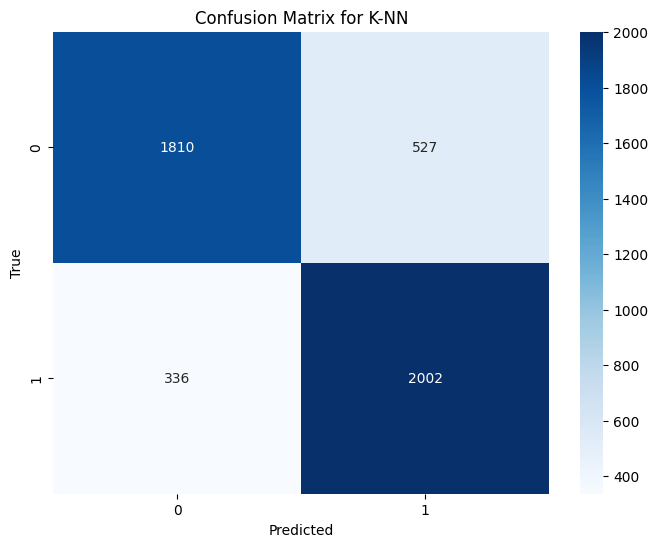

Naive Bayes Model Accuracy: 0.8226737967914438
----------------------------------------------------
Naive Bayes Model Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83      2337
           1       0.85      0.78      0.82      2338

    accuracy                           0.82      4675
   macro avg       0.82      0.82      0.82      4675
weighted avg       0.82      0.82      0.82      4675



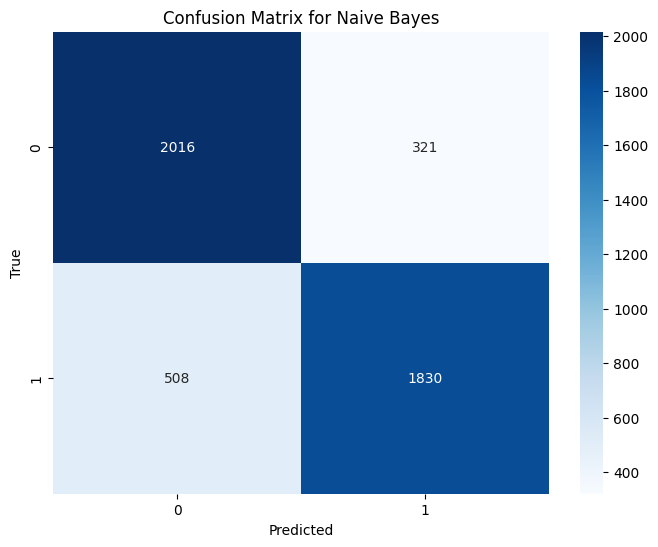

Accuracy: 0.9713
----------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2337
           1       0.97      0.98      0.97      2338

    accuracy                           0.97      4675
   macro avg       0.97      0.97      0.97      4675
weighted avg       0.97      0.97      0.97      4675



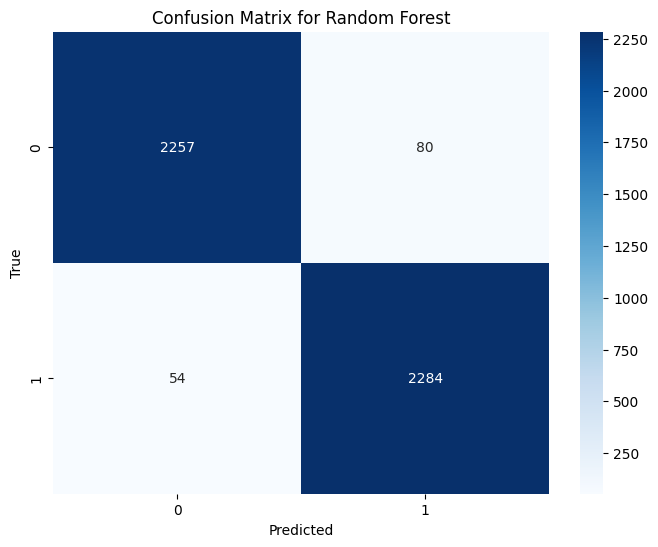

Logistic Regression Model Accuracy: 0.932192513368984
----------------------------------------------------
Logistic Regression Model Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      2337
           1       0.93      0.93      0.93      2338

    accuracy                           0.93      4675
   macro avg       0.93      0.93      0.93      4675
weighted avg       0.93      0.93      0.93      4675



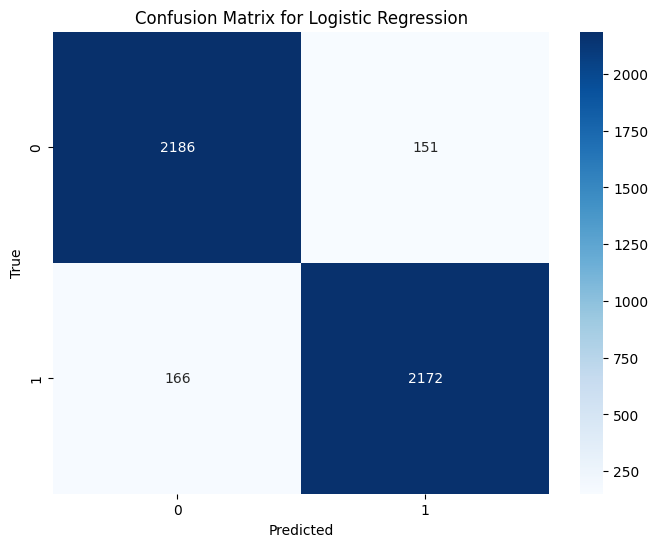

Epoch 1/20
585/585 [==============================] - 12s 18ms/step - loss: 0.6862 - accuracy: 0.8256 - val_loss: 0.6070 - val_accuracy: 0.8657
Epoch 2/20
585/585 [==============================] - 9s 16ms/step - loss: 0.5963 - accuracy: 0.8641 - val_loss: 0.5804 - val_accuracy: 0.8593
Epoch 3/20
585/585 [==============================] - 7s 13ms/step - loss: 0.5705 - accuracy: 0.8779 - val_loss: 0.5723 - val_accuracy: 0.8956
Epoch 4/20
585/585 [==============================] - 8s 14ms/step - loss: 0.5609 - accuracy: 0.8863 - val_loss: 0.5348 - val_accuracy: 0.8928
Epoch 5/20
585/585 [==============================] - 8s 13ms/step - loss: 0.5531 - accuracy: 0.8916 - val_loss: 0.5567 - val_accuracy: 0.9025
Epoch 6/20
585/585 [==============================] - 9s 15ms/step - loss: 0.5457 - accuracy: 0.8977 - val_loss: 0.5343 - val_accuracy: 0.9052
Epoch 7/20
585/585 [==============================] - 9s 15ms/step - loss: 0.5453 - accuracy: 0.8999 - val_loss: 0.5321 - val_accuracy: 0.901

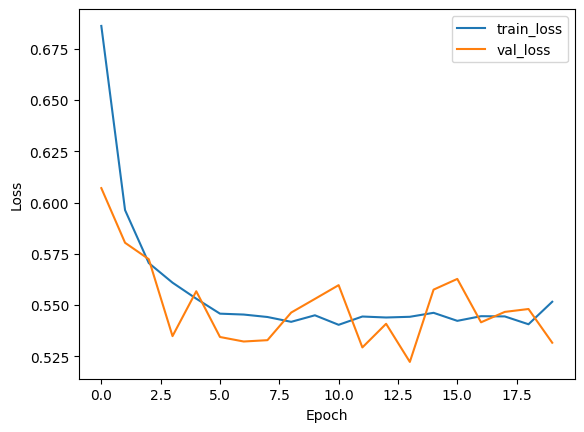

147/147 [==============================] - 0s 3ms/step


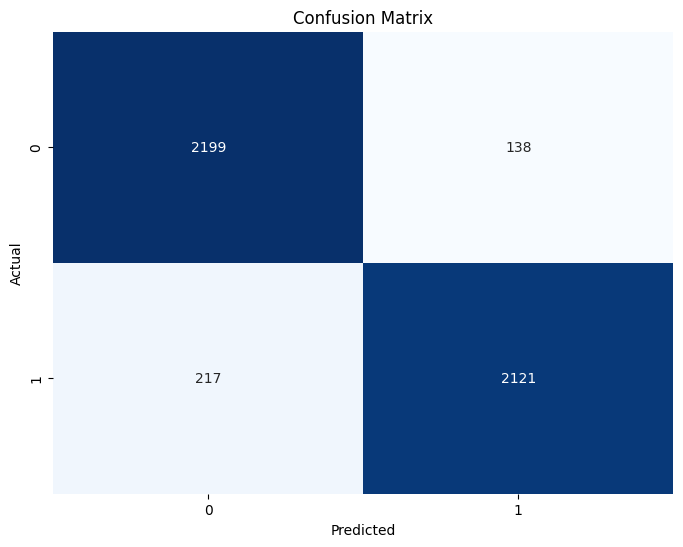

Accuracy: 0.9241
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      2337
           1       0.94      0.91      0.92      2338

    accuracy                           0.92      4675
   macro avg       0.92      0.92      0.92      4675
weighted avg       0.92      0.92      0.92      4675



In [6]:
merged_data['class'] = merged_data['class'].astype(str)
shuffled_data = merged_data[['lemmatized_text', 'class']].sample(frac=1, random_state=42).reset_index(drop=True)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(merged_data['lemmatized_text'].apply(lambda x: ' '.join(x))).toarray()

# Label Encoding for target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(merged_data['class'])

# Cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_tfidf, y_encoded):
    X_train, X_test = X_tfidf[train_index], X_tfidf[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    # K-NN modelini eğitin-------------------------------------------------------------------------------------------------------
    knn_model = KNeighborsClassifier()
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_knn)
    print("K-NN Model Accuracy:", accuracy)
    print("----------------------------------------------------")
    print("K-NN Model Classification Report:\n", classification_report(y_test, y_pred_knn))
    # Confusion Matrix for K-NN
    cm_knn = confusion_matrix(y_test, y_pred_knn)

    # Plot Confusion Matrix as a Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title('Confusion Matrix for K-NN')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    #-----------------------------------------------------------------------------------------------------------------------------

    # Naive Bayes modelini eğitin-------------------------------------------------------------------------------------------------
    nb_model = MultinomialNB()
    nb_model.fit(X_train, y_train)
    y_pred_nb = nb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_nb)
    print("Naive Bayes Model Accuracy:", accuracy)
    print("----------------------------------------------------")
    print("Naive Bayes Model Classification Report:\n", classification_report(y_test, y_pred_nb))

    # Confusion Matrix for Naive Bayes
    cm_nb = confusion_matrix(y_test, y_pred_nb)

    # Plot Confusion Matrix as a Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title('Confusion Matrix for Naive Bayes')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    #----------------------------------------------------------------------------------------------------------------------------

    # Random Forest modelini oluşturun--------------------------------------------------------------------------------------------
    svm_model = SVC()
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # n_estimators: Oluşturulan ağaç sayısı
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_rf)
    print(f'Accuracy: {accuracy:.4f}')
    print("----------------------------------------------------")
    print(classification_report(y_test, y_pred_rf))

    # Confusion Matrix for Random Forest
    cm_rf = confusion_matrix(y_test, y_pred_rf)

    # Plot Confusion Matrix as a Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title('Confusion Matrix for Random Forest')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    #-----------------------------------------------------------------------------------------------------------------------------

    # Logistic Regression modelini eğitin--------------------------------------------------------
    lr_model = LogisticRegression()
    lr_model.fit(X_train, y_train)
    y_pred_lr = lr_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_lr)
    print("Logistic Regression Model Accuracy:", accuracy)
    print("----------------------------------------------------")
    print("Logistic Regression Model Classification Report:\n", classification_report(y_test, y_pred_lr))

    # Confusion Matrix for Logistic Regression
    cm_lr = confusion_matrix(y_test, y_pred_lr)

    # Plot Confusion Matrix as a Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title('Confusion Matrix for Logistic Regression')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    #--------------------------------------------------------------------------------------------






    # Build and train a simple neural network using TensorFlow/Keras
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.6),
        tf.keras.layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

    # Plot epoch loss
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = (y_pred > 0.5).astype(int)

    # Confusion Matrix'i oluşturma
    cm = confusion_matrix(y_test, y_pred_classes)

    # Confusion Matrix'i görselleştirme
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred_classes)
    print(f'Accuracy: {accuracy:.4f}')
    print(classification_report(y_test, y_pred_classes))
